In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from get_processed_data import get_processed_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [7]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_smote, y_smote = smote(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_smote_scaled = scaler.transform(X_smote)
X_over_scaled = scaler.transform(X_over)
X_under_scaled = scaler.transform(X_under)

```No Sampling```

Lasso Coefficients: [-0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.02619655 -0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.02691296  0.
  0.00883222]
Accuracy: 0.9332036316472114
Confusion Matrix:
 [[1439    0]
 [ 103    0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


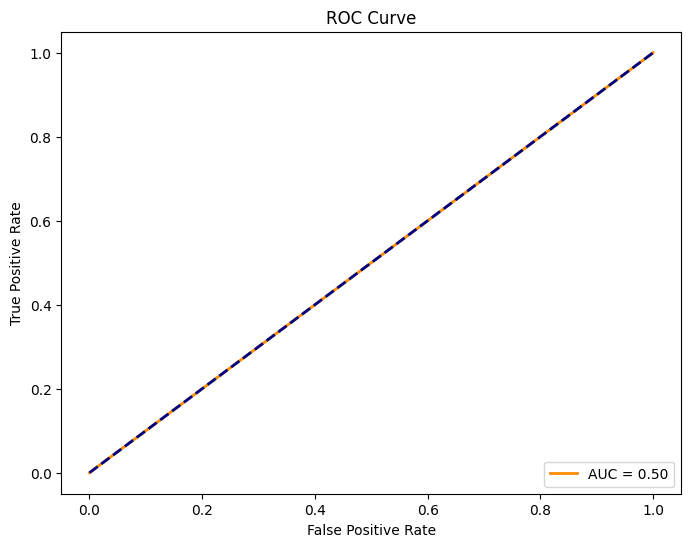

In [9]:
alpha_param = 0.01

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_train_scaled, y_train)

# Print the coefficients
print("Lasso Coefficients:", lasso_model.coef_)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```SMOTE```

Lasso Coefficients: [-0.00060486 -0.02007423 -0.00262683 -0.14454268 -0.15785612 -0.06389691
 -0.14396778 -0.1317394  -0.1717708  -0.05065556 -0.02549622 -0.02398128
 -0.         -0.00613601 -0.05529338 -0.02413861 -0.01345589 -0.
 -0.         -0.         -0.         -0.         -0.01298009 -0.00985627
 -0.00898931 -0.00469795 -0.         -0.07174012 -0.04711114 -0.
 -0.00252287 -0.          0.08822445 -0.         -0.01464087 -0.00620355
 -0.         -0.00507835  0.00701703 -0.01423673 -0.         -0.0006112
 -0.01804349 -0.04154571 -0.01360187 -0.01014468 -0.         -0.
 -0.00324694  0.01339143 -0.00825668 -0.02433189 -0.22704941 -0.11640704
 -0.07503174]
Accuracy: 0.9137483787289234
Confusion Matrix:
 [[1403   36]
 [  97    6]]
Precision: 0.14285714285714285
Recall: 0.05825242718446602
F1 Score: 0.08275862068965517


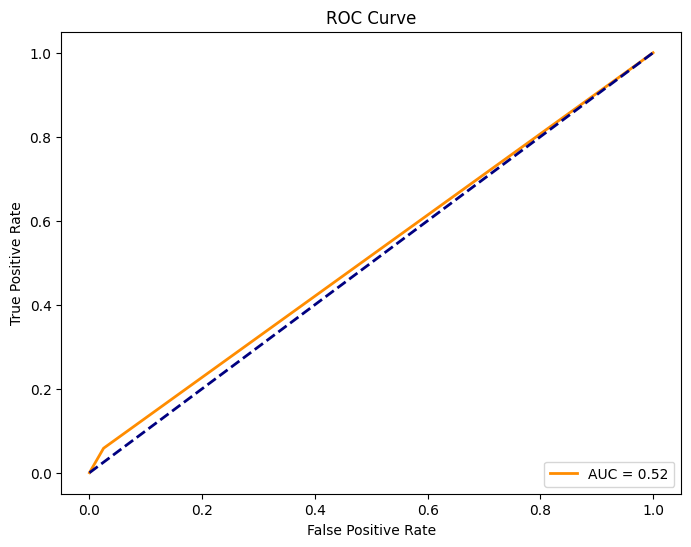

In [10]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_smote_scaled, y_smote)

print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Over-Sampling```

Lasso Coefficients: [-0.         -0.          0.00298399  0.          0.          0.
 -0.         -0.         -0.00279218  0.00954463 -0.         -0.
 -0.         -0.         -0.00630703  0.          0.         -0.
 -0.          0.00102848 -0.         -0.         -0.00154308  0.
 -0.0111521   0.          0.01148321 -0.          0.          0.00078112
 -0.         -0.02529392  0.19170228  0.         -0.         -0.
  0.00441613 -0.          0.01501974 -0.         -0.0055321  -0.
 -0.00095341 -0.         -0.         -0.         -0.          0.
 -0.00041217  0.03768531 -0.         -0.         -0.19806151  0.
  0.03961487]
Accuracy: 0.6141374837872893
Confusion Matrix:
 [[851 588]
 [  7  96]]
Precision: 0.14035087719298245
Recall: 0.9320388349514563
F1 Score: 0.24396442185514608


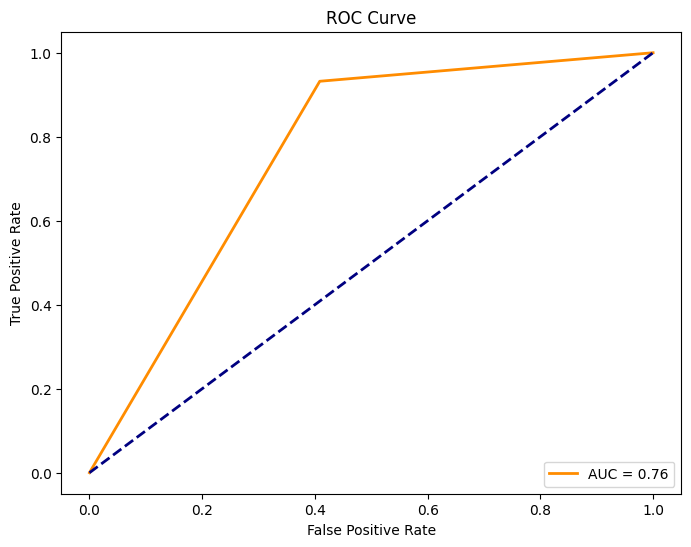

In [11]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_over_scaled, y_over)


print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Undersampling```

Lasso Coefficients: [-0.         -0.01062344  0.00989216  0.         -0.          0.
  0.          0.         -0.0078637   0.00559688 -0.00803667 -0.
  0.         -0.00172309 -0.00659839 -0.          0.         -0.
  0.          0.00030329  0.          0.         -0.0018275  -0.
 -0.00596792 -0.00040017  0.00366014 -0.          0.01032605  0.00728445
 -0.00231164 -0.005769    0.20039395 -0.         -0.00372832  0.
  0.02809212  0.          0.02346685 -0.         -0.         -0.01143003
 -0.         -0.00340681 -0.         -0.         -0.          0.00034694
  0.          0.02605811 -0.00061629  0.         -0.21691349  0.
  0.03866839]
Accuracy: 0.6134889753566797
Confusion Matrix:
 [[850 589]
 [  7  96]]
Precision: 0.14014598540145987
Recall: 0.9320388349514563
F1 Score: 0.2436548223350254


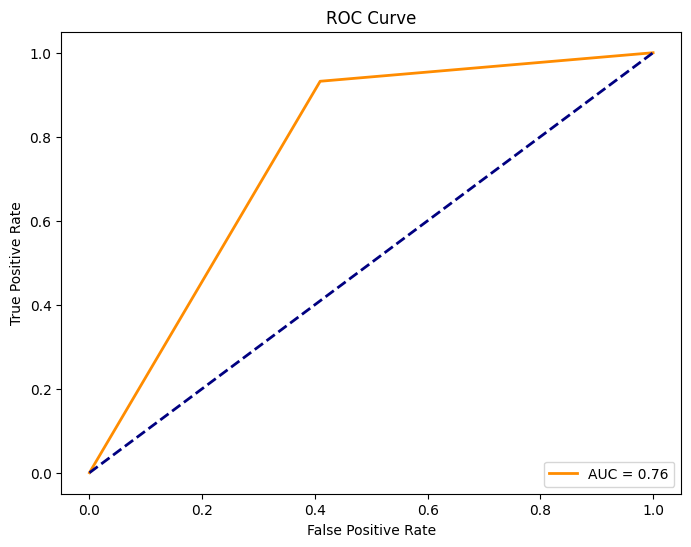

In [12]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_under_scaled, y_under)

print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()